In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1-DATASET IMPORT

In [52]:
df=pd.read_csv("insurance_cross_sell.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2-CHECK MISSING DATAS

In [53]:
df.shape     

(381109, 12)

In [54]:
df.count()

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

In [55]:
df.isna().sum()      #no missing data in the original dataset

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3-QUALITATIVE VARIABLES ENCODING

In [56]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
#GENDER ENCODING
gender_mapping={'Male':0, 'Female':1}
df['Gender']=df['Gender'].map(gender_mapping)
df.head()

# 0=MALE
# 1=FEMALE

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [58]:
#VEHICLE_DAMAGE ENCODING
vehicle_damage_mapping={'No':0, 'Yes':1}
df['Vehicle_Damage']=df['Vehicle_Damage'].map(vehicle_damage_mapping)
df.head()
# No = 0
# Yes = 1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [59]:
#VEHICLE_AGE ENCODING
vehicle_age_mapping = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
df['Vehicle_Age'] = df['Vehicle_Age'].replace(vehicle_age_mapping)
df.head()
# < 1 Year = 1
# 1-2 Years = 2
# > 2 Years = 3

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,1,0,27496.0,152.0,39,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4-CHECK BALANCING OF THE TARGET VARIABLE (RESPONSE) AND OTHER VARIABLES

In [60]:
#RESPONSE 
counts_response=df['Response'].value_counts()
counts_response


#The dataset is rather unbalanced towards a negative response to the proposal to purchase the policy (indicated with 0)

0    334399
1     46710
Name: Response, dtype: int64

In [61]:
print(f"NEGATIVE ANSWER:{counts_response[0]}  ({counts_response[0]/counts_response.sum()*100:.2f}%)")
print(f"POSTIIVE ANSWER:{counts_response[1]}  ({counts_response[1]/counts_response.sum()*100:.2f}%)")

NEGATIVE ANSWER:334399  (87.74%)
POSTIIVE ANSWER:46710  (12.26%)


In [62]:
#PREVIOUSLY_INSURED
counts_previously_insured=df['Previously_Insured'].value_counts()
counts_previously_insured

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [63]:
#POLICY_SALESE_CHANNEL
counts_policy_sales_channel=df['Policy_Sales_Channel'].value_counts()
counts_policy_sales_channel

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5- VARIABLES CORRELATION

In [64]:
#CORRELATION MATRIX

def create_heatmap(df):
    plt.figure(figsize=(12,6))  #It is used to decide the size of the graph
    sns.heatmap(df.corr(), annot=True, annot_kws={"size":10}) 
    plt.show()

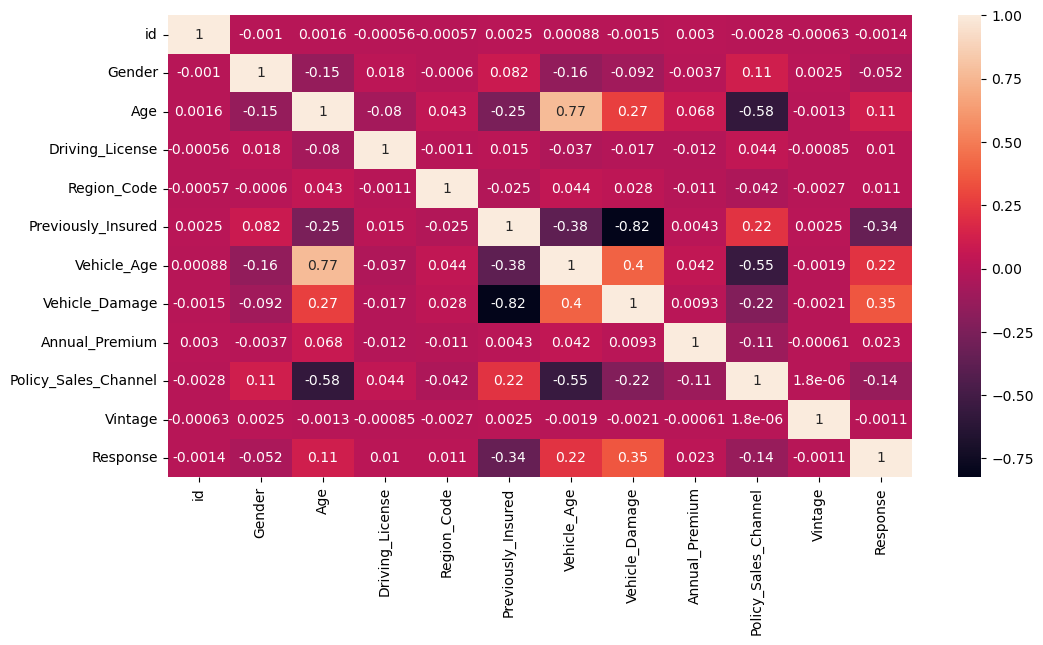

In [65]:
create_heatmap(df)

The variables Drivin_License, Vintage, Annual_Premium and Region_Code seem to have little correlation with the other variables, so we remove them from the model and see what happens

In [66]:
df=df.drop(['Driving_License', 'Vintage', 'Annual_Premium', 'Region_Code'], axis=1)
df.head()

,id,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,1,0,44,0,3,1,26.0,1
1,2,0,76,0,2,0,26.0,0
2,3,0,47,0,3,1,26.0,1
3,4,0,21,1,1,0,152.0,0
4,5,1,29,1,1,0,152.0,0


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

6- MODEL CREATION

In [80]:
X=df.drop('Response', axis=1).values
y=df['Response'].values


def model_1(df):
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

    ss=StandardScaler()
    X_train=ss.fit_transform(X_train)
    X_test=ss.transform(X_test)

    lr=LogisticRegression(class_weight="balanced")  #inserting class_weight="balanced", as the classes are rather unbalanced towards a greater frequency of negative response data
                                                    #the most frequent class will be penalized
    lr.fit(X_train, y_train) 

    #WE CALCULATE THE PREDICTIONS FOR THE SET TRAIN AND THE SET TEST, AND THE RESPECTIVE PROBABILITIES
    y_pred_train=lr.predict(X_train)
    y_proba_train=lr.predict_proba(X_train)
    y_pred_test=lr.predict(X_test)
    y_proba_test=lr.predict_proba(X_test)

    return lr, ss,X_train, X_test, y_train, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test

7-MODEL EVALUATION

In [81]:
from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    return report

In [82]:
# Training of logistic regression model_1
lr,ss, X_train, X_test, y_train, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test = model_1(df)

# Evaluation model
train_report = evaluate_model(y_train, y_pred_train)
test_report = evaluate_model(y_test, y_pred_test)

print("Classification Report - Train Set:")
print(train_report)
print("-----------------------------------------------------------------")
print("Classification Report - Test Set:")
print(test_report)

#the imbalance between samples that gave a negative response and those that gave a negative response is too great, therefore while a very high precision results
#for class 0 (negative response), it is very low for class 1. Even class_weight="balanced" did not solve the problem, we should therefore create a balanced dataset

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234159
           1       0.25      0.98      0.40     32617

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

-----------------------------------------------------------------
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100240
           1       0.25      0.98      0.40     14093

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



The model does not present optimal values, in particular with regard to the positive class identified with the value 1 (i.e. the customers who gave a positive response to the policy proposal) in the target variable "Response".
In fact, the model presents a precision value of 0.25 for the positive class for both the training and test sets (while for the negative class it is 0.99). The recall value, however, is very high, 0.98. The accuracy is 64%, so not very high.
Overall however, considering that the creation of the model should serve to identify potential customers interested in subscribing to a policy, we can say that a recall of 0.98 for class 1 means that the model is able to correctly identify 98% of potential buyers among the actual data belonging to that class. However, the low precision (0.25) for class 1 indicates that the model has a fairly high probability of making classification errors in class 1, i.e. classifying customers as potential buyers who in reality are not; thus the model could identify many false positives in class 1.
In conclusion, if we assume that we have identified a potential buyer with a high probability of purchasing the policy based on high recall, we must keep in mind that we may have classified him as a false positive and therefore he is not actually interested in the policy. However, considering that in the original dataset the individuals who showed themselves willing to purchase were only 12.26%, the 25% probability of identifying a potential buyer among those present in that class is certainly more acceptable.
The metrics are similar on both the training and test sets, so we shouldn't worry about overfitting.
Let's try to improve the model by balancing the target variable Response, which is very unbalanced in favor of class 0.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

8- UNDERSAMPLING

In [71]:

from imblearn.under_sampling import RandomUnderSampler

In [72]:
def model_2(df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    ss = StandardScaler()
    X_train_resampled = ss.fit_transform(X_train_resampled)
    X_test = ss.transform(X_test)
    
    lr = LogisticRegression(class_weight="balanced")
    lr.fit(X_train_resampled, y_train_resampled)
    
    y_pred_train = lr.predict(X_train_resampled)
    y_proba_train = lr.predict_proba(X_train_resampled)
    y_pred_test = lr.predict(X_test)
    y_proba_test = lr.predict_proba(X_test)
    
    train_report = classification_report(y_train_resampled, y_pred_train)
    test_report = classification_report(y_test, y_pred_test)
    
    return lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report

In [73]:
# training and evaluation of the second model (model_2)
lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report = model_2(df)

print("Classification Report - Train Set (Model 2):")
print(train_report)
print("------------------------------------------------------------")
print("Classification Report - Test Set (Model 2):")
print(test_report)

Classification Report - Train Set (Model 2):
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32746
           1       0.70      0.98      0.82     32746

    accuracy                           0.78     65492
   macro avg       0.83      0.78      0.77     65492
weighted avg       0.83      0.78      0.77     65492

------------------------------------------------------------
Classification Report - Test Set (Model 2):
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100369
           1       0.25      0.98      0.40     13964

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



After undersapling by balancing the classes of the training set, the metrics seem to be much better than the previous model in the training set. In particular for class 1 the precision rises to 0.71 for the training set, which means that now the model will have a 70% probability of identifying a person interested in purchasing the policy and that 98% will be interested in purchasing it. However, the test set has low precision and lower accuracy, so there seems to be overfitting.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

REGULARIZATION

In [74]:

from sklearn.linear_model import LogisticRegressionCV

In [75]:
def model_2_with_regularization(df):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    ss = StandardScaler()
    X_train_resampled = ss.fit_transform(X_train_resampled)
    X_test = ss.transform(X_test)
    
    # Adding L1 regularization
    lr = LogisticRegressionCV(penalty='l2', solver='liblinear', class_weight="balanced", cv=5)
    lr.fit(X_train_resampled, y_train_resampled)
    
    y_pred_train = lr.predict(X_train_resampled)
    y_proba_train = lr.predict_proba(X_train_resampled)
    y_pred_test = lr.predict(X_test)
    y_proba_test = lr.predict_proba(X_test)
    
    train_report = classification_report(y_train_resampled, y_pred_train)
    test_report = classification_report(y_test, y_pred_test)
    
    return lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report

In [76]:
lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report = model_2_with_regularization(df)

print("Classification Report - Train Set (Model 2):")
print(train_report)
print("------------------------------------------------------------")
print("Classification Report - Test Set (Model 2):")
print(test_report)

Classification Report - Train Set (Model 2):
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32793
           1       0.71      0.98      0.82     32793

    accuracy                           0.78     65586
   macro avg       0.83      0.78      0.78     65586
weighted avg       0.83      0.78      0.78     65586

------------------------------------------------------------
Classification Report - Test Set (Model 2):
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100416
           1       0.25      0.98      0.40     13917

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



Despite the regularization there continues to be overfitting, so I would use model 1, which despite having non-optimal values, does not present overfitting

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

CROSS VALIDATION

In [77]:
from sklearn.model_selection import cross_validate

def model_2_with_cross_val(df, cv=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

    ss = StandardScaler()
    X_train_resampled = ss.fit_transform(X_train_resampled)
    X_test = ss.transform(X_test)

    # Adding L1 regularization
    lr = LogisticRegressionCV(penalty='l2', solver='liblinear', class_weight="balanced", cv=cv)

    # model training
    lr.fit(X_train_resampled, y_train_resampled)

    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(lr, X_train_resampled, y_train_resampled, cv=cv, scoring=scoring, return_train_score=True)

    # Predictions on the training set
    y_pred_train = lr.predict(X_train_resampled)
    y_proba_train = lr.predict_proba(X_train_resampled)

    # Predictions on the test set
    y_pred_test = lr.predict(X_test)
    y_proba_test = lr.predict_proba(X_test)

    # classification reports
    train_report = classification_report(y_train_resampled, y_pred_train)
    test_report = classification_report(y_test, y_pred_test)

    return lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report, results

In [78]:

lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report, results = model_2_with_cross_val(df)

print("cross-validation results:")
print("Accuracy - Train set: ","{:.2f}".format( np.mean(results['train_accuracy'])))
print("Accuracy - Test set: ","{:.2f}".format( np.mean(results['test_accuracy'])))
print("------------------------------------------------------------------")
print("Precision - Train set: ","{:.2f}".format( np.mean(results['train_precision'])))
print("Precision - Test set: ","{:.2f}".format( np.mean(results['test_precision'])))
print("------------------------------------------------------------------")
print("Recall - Train set: ","{:.2f}".format( np.mean(results['train_recall'])))
print("Recall - Test set: ","{:.2f}".format( np.mean(results['test_recall'])))
print("------------------------------------------------------------------")
print("F1-score - Train set: ","{:.2f}".format( np.mean(results['train_f1'])))
print("F1-score - Test set: ","{:.2f}".format( np.mean(results['test_f1'])))

cross-validation results:
Accuracy - Train set:  0.78
Accuracy - Test set:  0.78
------------------------------------------------------------------
Precision - Train set:  0.70
Precision - Test set:  0.70
------------------------------------------------------------------
Recall - Train set:  0.98
Recall - Test set:  0.98
------------------------------------------------------------------
F1-score - Train set:  0.82
F1-score - Test set:  0.82


the cross validation results look good and don't even seem to suffer from overfitting, so we will choose this model over the others

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

MODEL TEST ON A NEW DATASET

In [83]:
new_df=pd.read_csv("previsione.csv")
gender_mapping={'Male':0, 'Female':1}
new_df['Gender']=new_df['Gender'].map(gender_mapping)

In [84]:
vehicle_damage_mapping={'No':0, 'Yes':1}
new_df['Vehicle_Damage']=new_df['Vehicle_Damage'].map(vehicle_damage_mapping)

In [85]:
vehicle_age_mapping = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
new_df['Vehicle_Age'] = new_df['Vehicle_Age'].replace(vehicle_age_mapping)
new_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,54,0,44,1,28.0,0,3,1,40454.0,26.0,217
1,68,0,76,1,3.0,0,2,0,33536.0,26.0,183
2,896,0,47,1,28.0,0,3,1,38294.0,26.0,27
3,56,0,21,1,11.0,1,1,0,28619.0,152.0,203
4,154,1,29,1,41.0,1,1,1,27496.0,152.0,39


In [86]:
new_df=new_df.drop(['Driving_License', 'Vintage', 'Annual_Premium', 'Region_Code'], axis=1)
new_df.head()

,id,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,54,0,44,0,3,1,26.0
1,68,0,76,0,2,0,26.0
2,896,0,47,0,3,1,26.0
3,56,0,21,1,1,0,152.0
4,154,1,29,1,1,1,152.0


In [87]:
lr, X_train_resampled, X_test, y_train_resampled, y_test, y_pred_train, y_proba_train, y_pred_test, y_proba_test, train_report, test_report, results = model_2_with_cross_val(new_df)

new_X = ss.transform(new_df.values)   # Standardize the new dataset as you did with the training data
new_predictions = lr.predict(new_X)   #  Predicts labels for the new dataset
new_probabilities = lr.predict_proba(new_X)   # Probabilities on the new dataset

In [88]:
df_results=pd.DataFrame({
    "ID number" : new_df["id"],
    "prediction" : new_predictions,
    "probability" : new_probabilities.max(axis=1).round(2) 
})
df_results = pd.DataFrame(df_results)
df_results["response_label"] = df_results["prediction"].apply(lambda x: "Positive answer" if x == 1 else "Negative answer")
df_result= df_results[["ID number", "prediction", "response_label", "probability"]]


In [89]:
df_results

,ID number,prediction,probability,response_label
0,54,1,0.91,Positive answer
1,68,0,0.56,Negative answer
2,896,1,0.91,Positive answer
3,56,0,0.91,Negative answer
4,154,0,0.71,Negative answer
5,654,1,0.73,Positive answer
6,82,1,0.76,Positive answer
7,546,1,0.82,Positive answer
8,859,0,0.92,Negative answer
9,2054,0,0.93,Negative answer
